# Quick analysis of COVID-19 Data
The data was pulled from the <a href='https://coronavirus.jhu.edu/map.html'>Johns Hopkins Center for Systems Science and Engineering (CSSE)</a>

Data was captured from their github page (https://github.com/CSSEGISandData/COVID-19) on 4/7. You can run this Jupyter Notebook to pull the latest data and plot it.

First, import required python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now pull the US data. The US data is broken down by state and county.
After download of the csv file into a pandas dataframe, show the beginning of the file.

In [2]:
df_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_deaths_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
df_recovered_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

df_deaths_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,83,84,84,86,86,92,94,95,97,97
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,3,4,4,4,4,4,4,4,4,4


Then, read the global data, which is broken down by country.

In [3]:
df_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [4]:
covid_data = {'global_cases':df_global, 'global_deaths':df_deaths_global, 'global_recovered':df_recovered_global,'us_cases':df_us, 'us_deaths':df_deaths_us, 'us_recovered':df_recovered_us }

Define a function that takes a dataframe and matches a value for the column name to a country/state name to extract the number of confirmed cases and creates a few plots of the time series data.

In [5]:
def plot_data(data,column_name,column_val):
    if column_name=='Country/Region':
        dataframe = data['global_cases']
        deaths = data['global_deaths']
    elif column_name=='Province_State':
        dataframe = data['us_cases']
        deaths = data['us_deaths']
        
    cc = dataframe[dataframe[column_name]==column_val].iloc[:,11:].T.sum(axis = 1)
    cc = pd.DataFrame(cc)
    cc.columns = ['Cases']
    cc = cc.loc[cc['Cases']>0]

    y = np.array(cc['Cases'])
    x = np.arange(cc.size)
    dy = np.append([0],np.diff(y))
    
    cd = deaths[deaths[column_name]==column_val].iloc[:,12:].T.sum(axis = 1)
    cd = pd.DataFrame(cd)
    cd.columns = ['Deaths']
    cd = cd.loc[cd['Deaths']>0]

    yd = np.array(cd['Deaths'])
    xd = np.arange(cd.size)
    dd = np.append([0],np.diff(yd))
    
    plt.figure(1,figsize=(15,15))
    ax1=plt.subplot(221)
    ax1.semilogy(x,y)
    plt.title(column_val+' Number of cases (semilog)')
    plt.xlabel('days')
    plt.ylabel('Cumulative Cases (log)')
    ax1.minorticks_on()
    ax1.grid(which='minor',linestyle=':')
    ax1.grid(which='major',linestyle='-')
       
    ax2=plt.subplot(222)
    ax2.bar(x,dy)
    plt.title(column_val+' Daily increase in cases (linear)')
    plt.xlabel('days')
    plt.ylabel('Change in cases')
    ax2.grid()
    
    try:
        ax3=plt.subplot(223)
        ax3.loglog(y,dy,'b.')
        plt.title(column_val+' Cumulative cases vs Change in cases (loglog)')
        plt.xlabel('Cululative cases (log)')
        plt.ylabel('Change in cases (log)')
        ax3.minorticks_on()
        ax3.grid(which='minor',linestyle=':')
        ax3.grid(which='major',linestyle='-')
    except:
        print(y.size,dy.size)
        
    ax4=plt.subplot(224)
    ax4.bar(xd,dd)
    plt.title(column_val+' Daily increase in deaths (linear)')
    plt.xlabel('days')
    plt.ylabel('Change in deaths')
    ax2.grid()
        

Let's first look at the South Korea total numbers.

The first plot is total cases versus time on a semilog plot. If this curve is linear, then the cases are growing exponentially. This exponential growth can't be sustained indefinitely. Eventually the whole population will be infected, if unchecked and the number of cases will stop rising. Measures like social distancing and quarantine with or without contact tracing will also stop the growth. The curve will actually be a logistic curve in the end.

The slope of the semilog plot represents the exponent $n$ of the exponential model:

$c = c_0e^{nt}$

since, taking the log, we have a linear plot in time with the slope as $n$:

$ln(c) = nt+ln(c_0)$

To find the time to double, we use $2c_0 = c_0e^{nt}$ and solve for t:

$t_d = ln(2)/n$

The second plot below shows daily increase in cases.

A useful plot to determine if you are starting to make a difference in slowing or stopping the spread is to plot a loglog plot with total cases on the x axis and new cases on the y axis. The time aspect on this plot is inferred, since it is just a scatter plot of these data points over time. 

On the plot of cases for South Korea, you can see that they were able to slow growth by noting the 'knee' in the curve when new cases started to slow down.

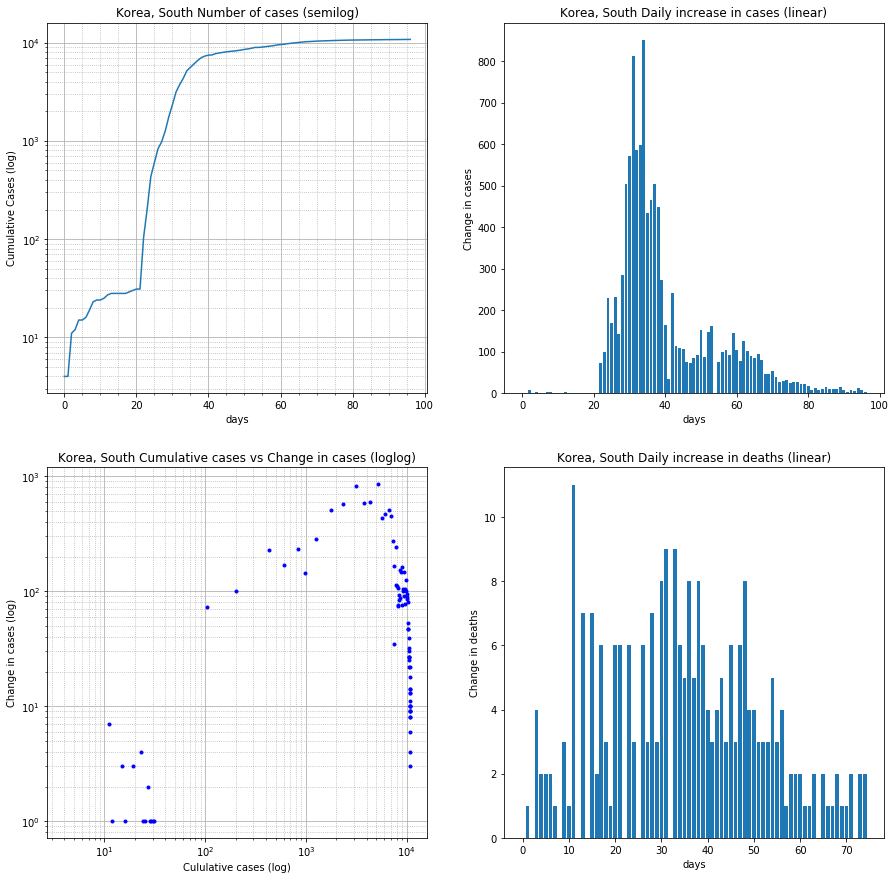

In [6]:
plot_data(covid_data,'Country/Region','Korea, South')

Now, looking at Italy, we can see that they have started to make a difference, but new cases has not gone to zero yet.

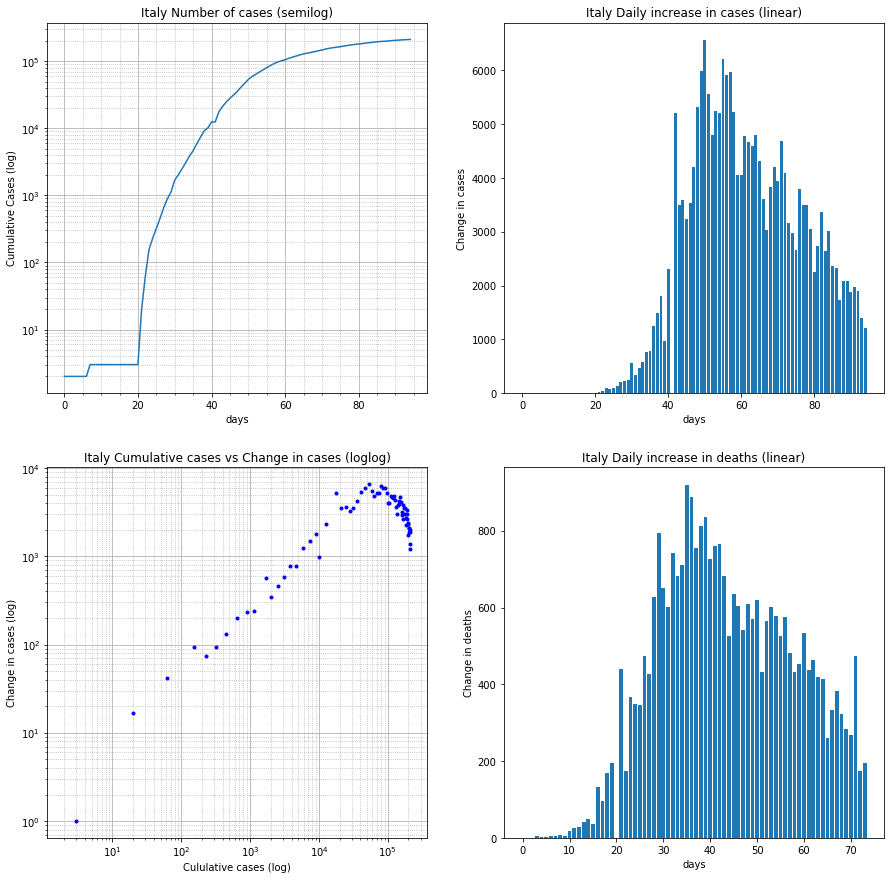

In [7]:
plot_data(covid_data,'Country/Region','Italy')

China's data is suspect, but here are the official numbers. The loglog plot looks very different than other countries'. This is a tip-off that something is funny with the data.

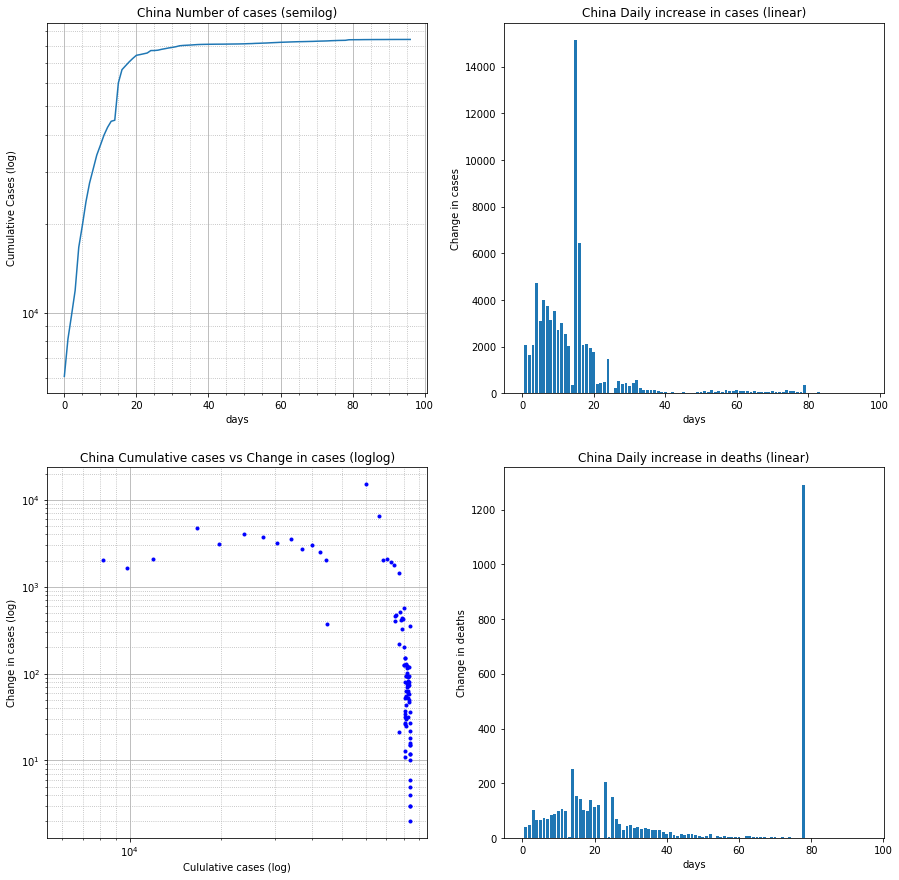

In [8]:
plot_data(covid_data,'Country/Region','China')

In the US, there is still a long way to go as of 4/7, but the slope has started to decrease.

By the way, the number of days for cases to double is inversely proportional to the slope of the semilog curve.

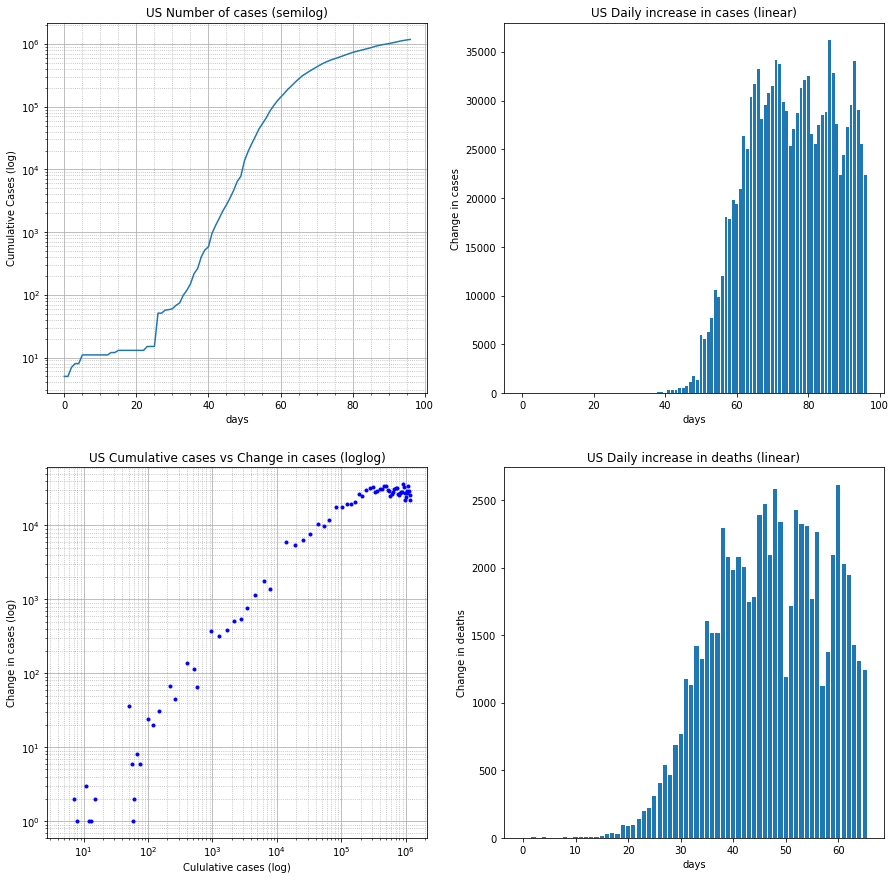

In [9]:
plot_data(covid_data,'Country/Region','US')

Now, let's look at some individual states, starting with the state with the most cases, NY. It looks like the curve is bending now.

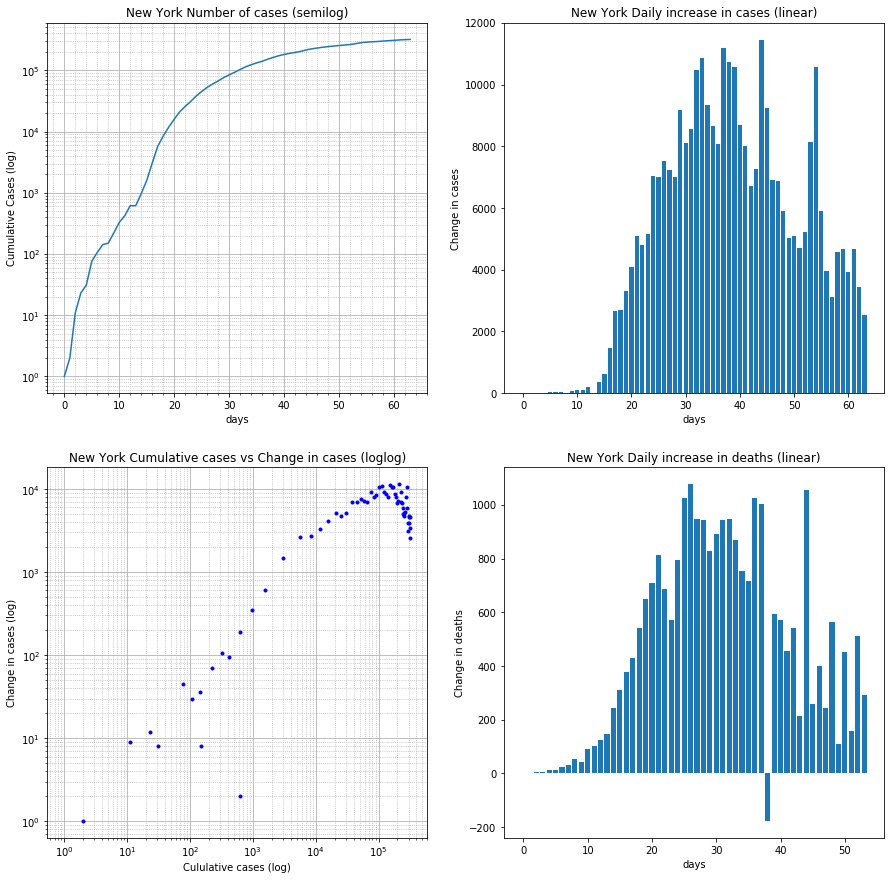

In [10]:
plot_data(covid_data,'Province_State','New York')

How about NJ? It's bending, too.

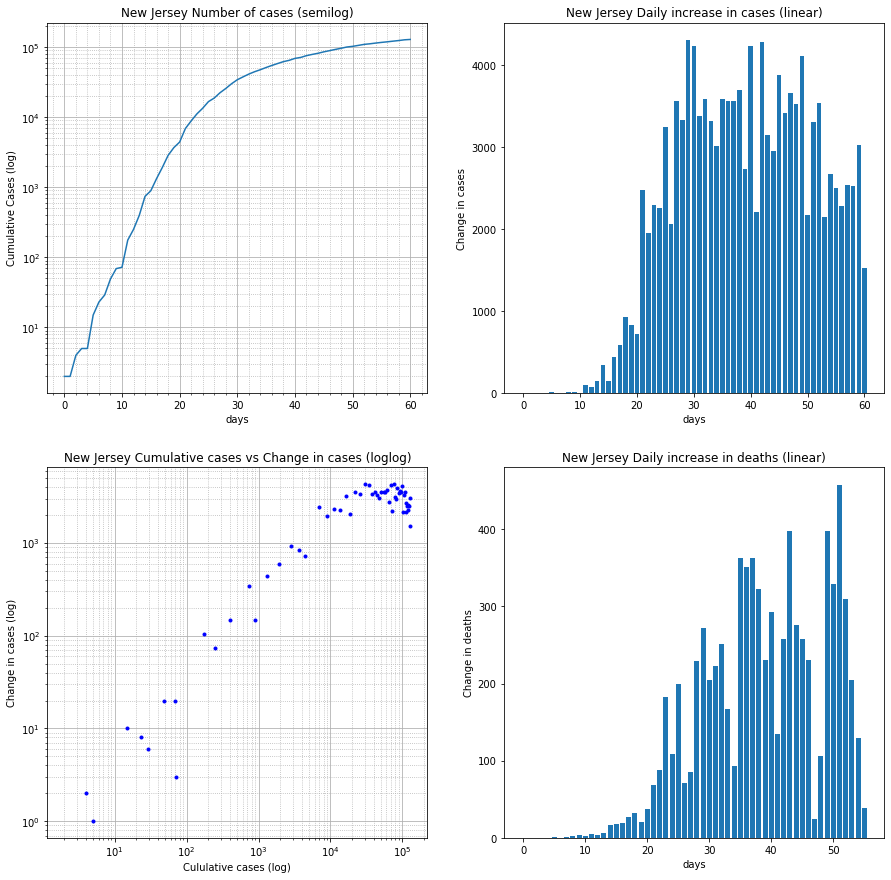

In [11]:
plot_data(covid_data,'Province_State','New Jersey')

Washington's data is kind of noisy, since there are fewer data points, but growth has definitely been slower than NY/NJ.

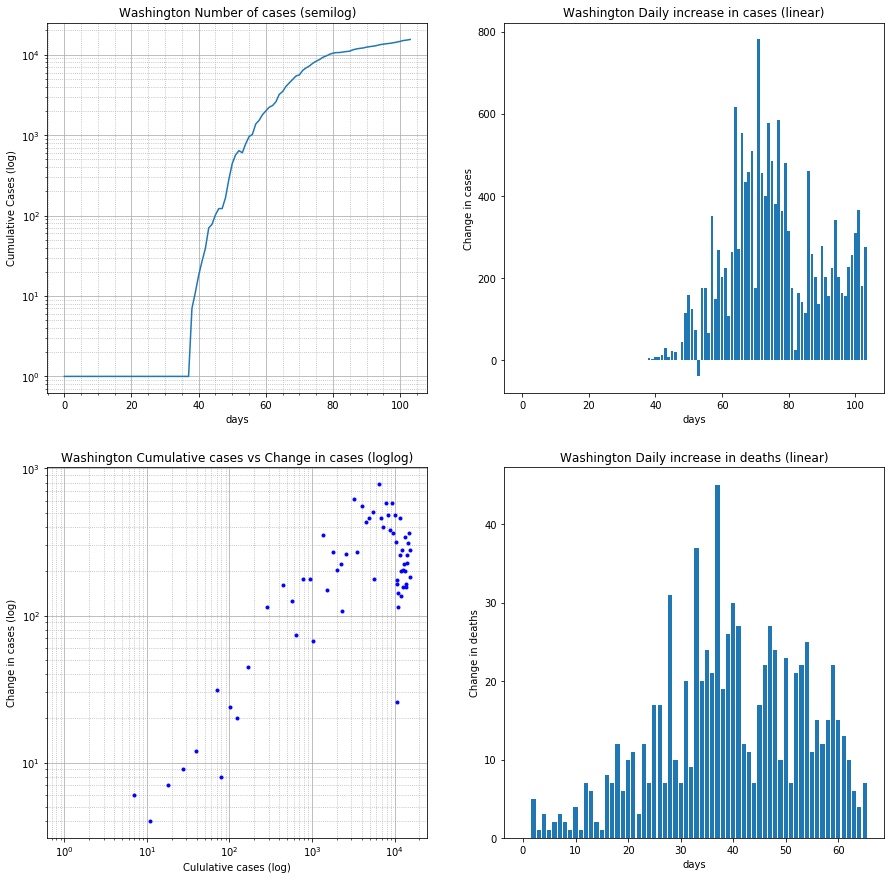

In [12]:
plot_data(covid_data,'Province_State','Washington')

Let's check out California. It looks like they have started bending slightly, but the data is a bit jumpy.

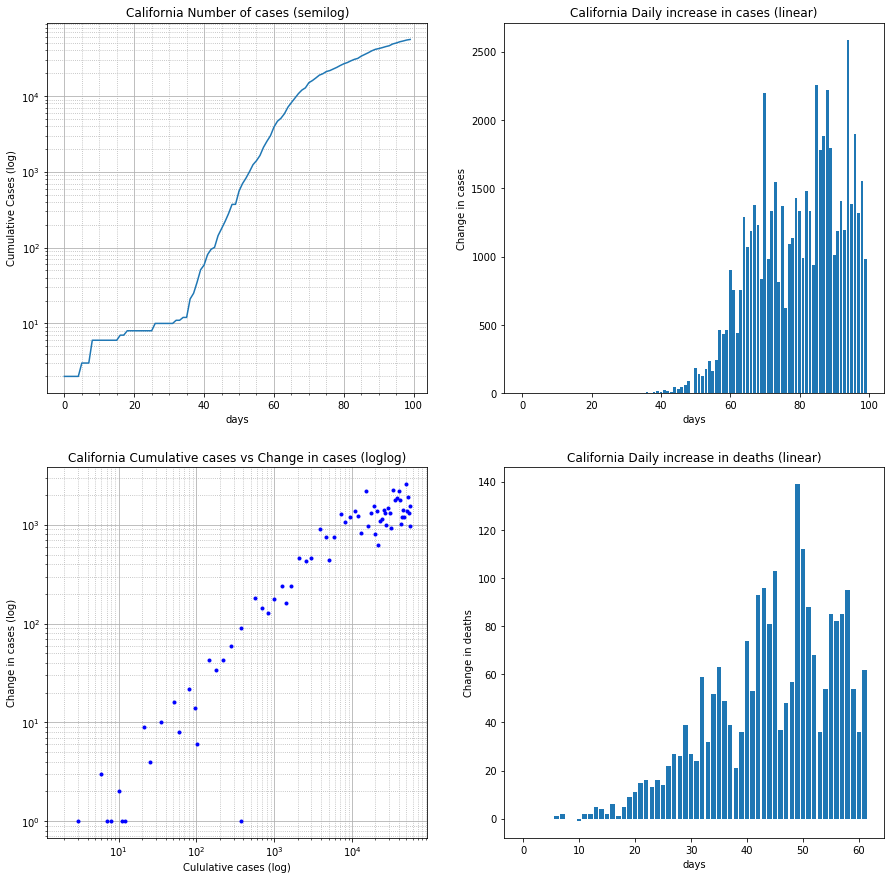

In [13]:
plot_data(covid_data,'Province_State','California')

Florida looks like it is on the decline despite their delay in instituting stay-at-home policies. Maybe that's a sign that the disease is declining everywhere and not just in places that have strict lock downs. That would be a good thing...

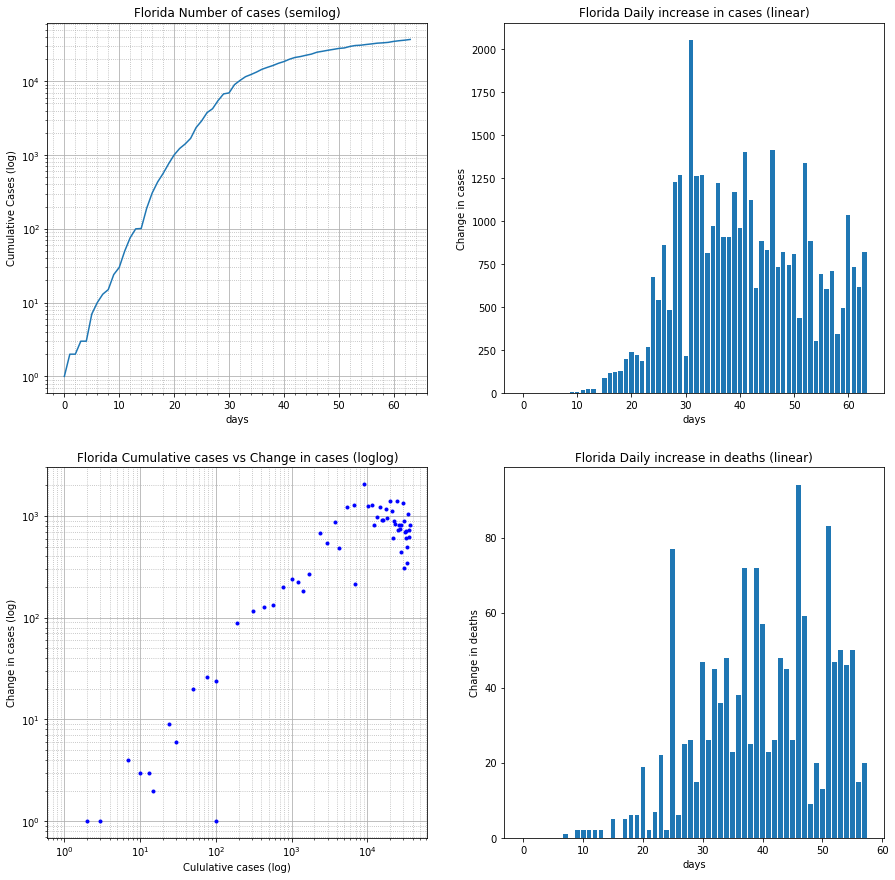

In [14]:
plot_data(covid_data,'Province_State','Florida')

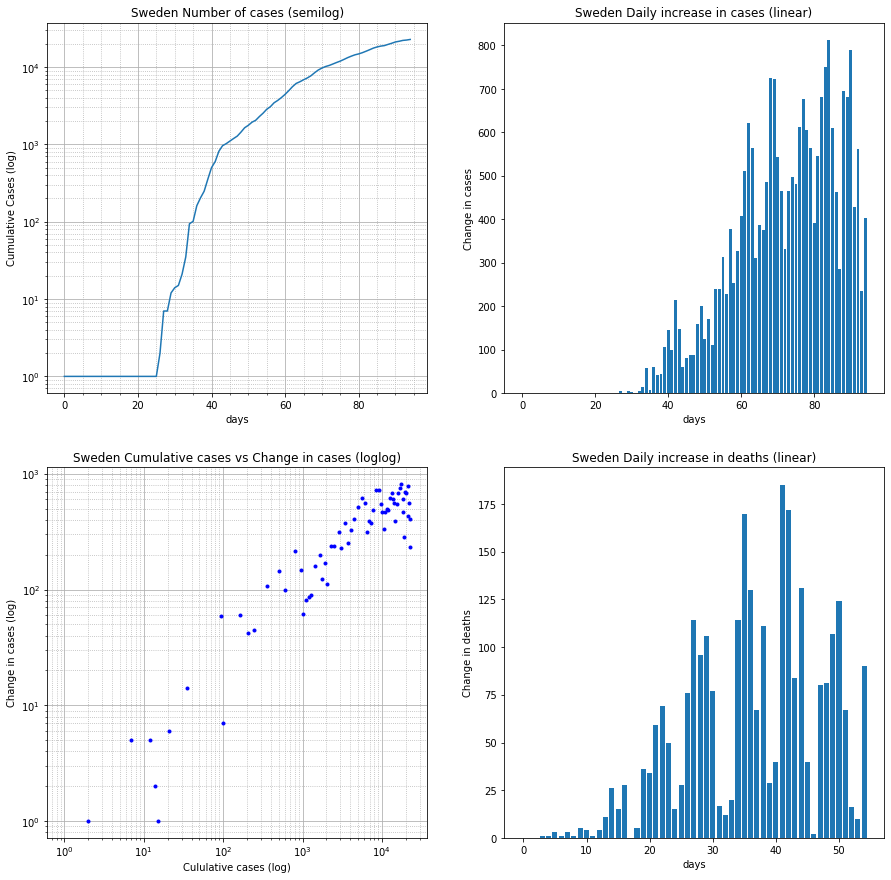

In [15]:
plot_data(covid_data,'Country/Region','Sweden')

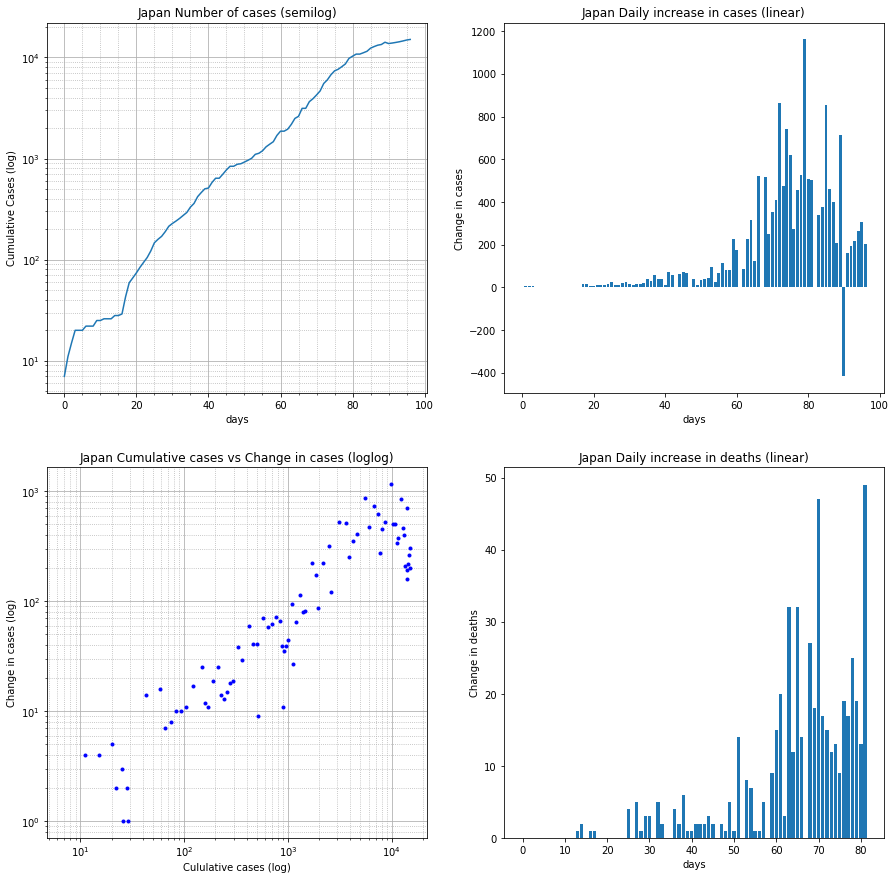

In [16]:
plot_data(covid_data,'Country/Region','Japan')

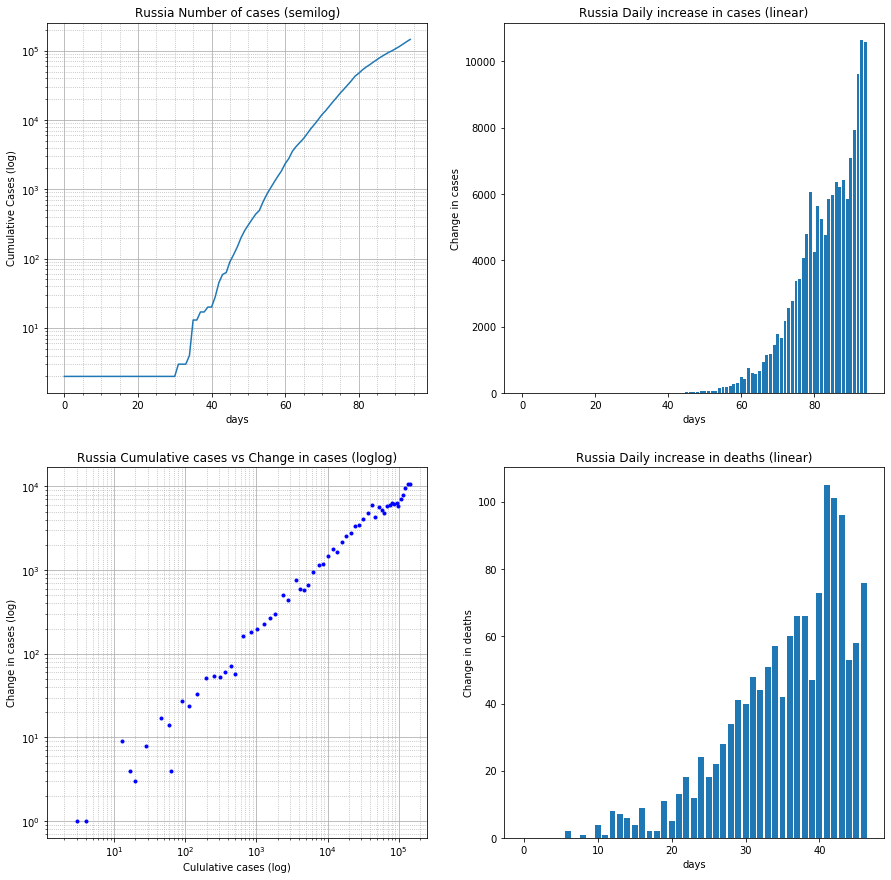

In [17]:
plot_data(covid_data,'Country/Region','Russia')

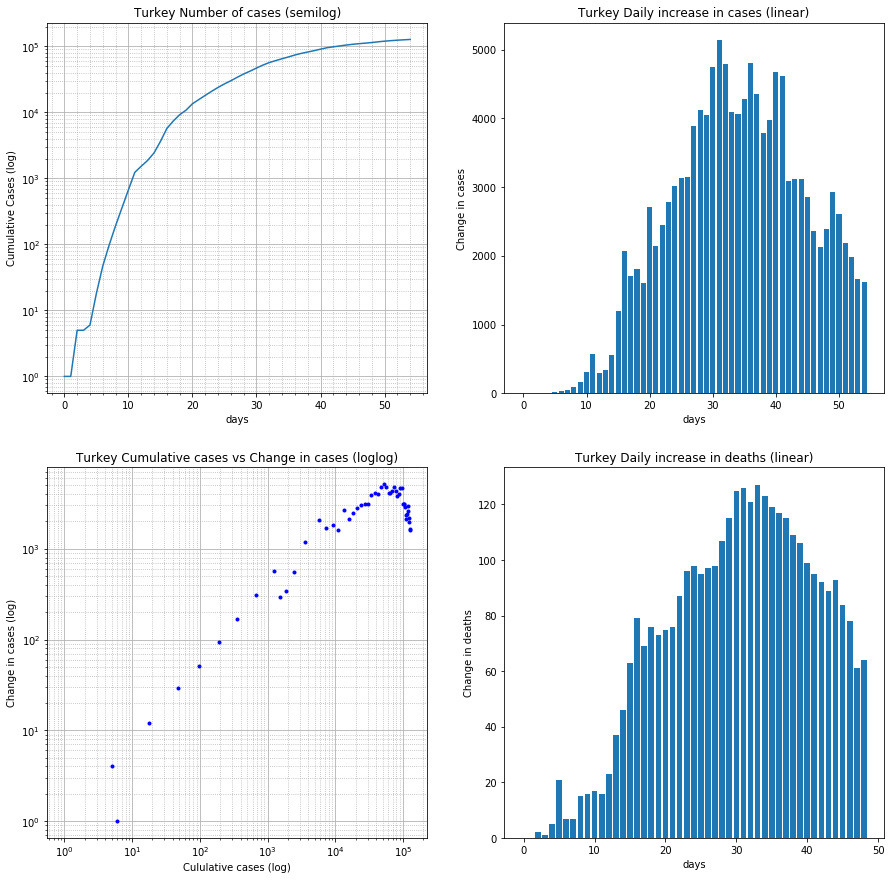

In [18]:
plot_data(covid_data,'Country/Region','Turkey')